## Astro 304 "Galaxies"

### Homework 4 (55 points)

### Top-hat collapse model, stellar mass-halo mass relation from abundance matching and galaxy formation model

### Due, Friday, May 12, 9pm

<b>1. (15 points)</b> Consider a spherical top hat collapse perturbation model discussed in class on Wednesday and described in the <a href="https://github.com/a-kravtsov/a304s17/blob/master/ex07_peaks.ipynb"><tt>ex07_peaks</tt></a> notebook. This model has a simple analytic solution described in the notebook for cosmologies of different $\Omega_{\rm m}$ but $\Omega_\Lambda=0$. $\Omega_\Lambda\ne 0$ case can be done as well, but differential equation needs to be solved numerically and we will not deal with this here. Most of the evolution for real collapsing peaks occurs during epochs when $\Omega_{\rm m}(z)$ is close to unity, so calculations done in cosmologies with  $\Omega_\Lambda=0$ give a fairly good picture of what happens generally. 

Let's assume we consider evolution of a spherical constant-density perturbation of *comoving* radius $R_i=1.5h^{-1}\ \rm Mpc$ starting at the initial redshift of $z_i=100$ that has and overdensity 

$$\delta_i=\frac{ \rho_i } { \bar{\rho}(z_i) } - 1$$
* What are the reasonable choices for $\delta_i$ value at this $z_i$? In particular, for what $\delta_i$ values perturbation would collapse before $z=0$? (1 points)   
<b> Answer: </b> Since $\delta(a) \sim a = (1+z)^{-1}$ and collapse occurs at critical linear overdensity $ \delta_c = 1.6 $, then $\delta_i = \delta(z = z_i) > 1.6/100 \sim 0.02$ in order for collapse to occur before $ z = 0 $. We can round up significantly because including the very late time accelerated expansion will only slightly (factor of a few) increase the required initial overdensity.   


* What is the mass associated with the perturbation? Approximately how rare are perturbations of this mass at $z_i=100$ with the amplitude required for collapse before $z=0$? (2 points)   
<b> Answer: </b> $$ M_i = 4/3 \pi R_p(z_i)^3 \bar{\rho}(z_i)(1 + \delta_i)$$
where $R_p(z_i) = a(z_i) R_i $ and $\delta_i << 1 $ s.t. $ M \sim 4 (R_i/100)^3 \bar{\rho}(z_i)  $. Finally $ \bar{\rho}(z_i) = \rho_{0,m}(1 + z)^3 \simeq 10^{11} M_\odot Mpc^{-3} h^2 (100)^3 $ s.t.$$ M_i\sim 10^{12}h^{-1} M_\odot $$

* What initial velocity should be assigned to the outermost radial shell $R_i$ of the pertubation? (1 points)




* Assuming that collapsed peak reaches "virial equilibrium" corresponding to $2K+W=0$, where $K$ its "internal" energy and $W$ is the potential energy, compute "virial overdensity" - i.e., $\delta(t=t_{\rm vir}=\delta_{\rm vir}$ - relative to the background density for $\Omega_{\rm m}=1.0$ and $\Omega_{\rm m}=0.3$ cosmologies. Explain the difference between $\delta_{\rm vir}$ for these cosmologies qualitatively. (5 points)


For calculations, you can use colossus code routines, some of which should be handy for the exercise. A few relevant examples are given in the code below, you can find out about other cosmology routines in the colossus <a href="https://bdiemer.bitbucket.io/cosmology_cosmology.html">here</a>. Note that these routines can be called with scalar inputs, like $z$ or $R$, but also vector ones. In the latter case, a vector of relevant quantities will be returned. 

In [52]:
import numpy as np
# import Benedikt Diemer's colossus package
from colossus.cosmology import cosmology
# set cosmology parameters
params = {'flat': False, 'H0': 70.0, 'Om0': 0.3, 'relspecies': False, 'OL0': 0, 
          'Ob0': 0.049, 'sigma8': 0.8, 'ns': 0.968, 'print_warnings': False}
cosmo = cosmology.setCosmology('mycosmo', params )

R = 1.5 # comoving in h^{-1} Mpc
z = 100.0
M = cosmo.lagrangianM(R) # returns mass in /h Msun
# compute rms fluctuations on comoving scale R at redshift z
sig = cosmo.sigma(R, z=z, j=0) 
# compute expansion rate H(z) at redshift z in km/s/Mpc
Hz = cosmo.Hz(z)  
# age of the universe at z
tz = cosmo.age(z)
# Omega_m at redshift z
Omz = cosmo.Om(z)
# density of matter at redshift z
rhoz = cosmo.rho_m(z) # in h^2 Msun/kpc^3
# growth factor of the universe normalize to 1.0 at z=0
Dz = cosmo.growthFactor(z)

print("M = %.3e (h^-1 Msun); sigma = %.3f;"%(M, sig))

print("z = {0:.3f}; t = {1:.6} (Gyrs); Omega(z) = {2:.3e}; H(z) = {3:.3e} (km/s/Mpc);"
      "rhoz = {4:.3e} (h^2 Msun/kpc^3)".format(z, tz, Omz, Hz, rhoz))

print("z = {0:.3f}; D_+(z) = {1:.6}".format(z, Dz))

M = 1.177e+12 (h^-1 Msun); sigma = 0.044;
z = 100.000; t = 0.0166 (Gyrs); Omega(z) = 9.774e-01; H(z) = 3.936e+04 (km/s/Mpc);rhoz = 8.577e+07 (h^2 Msun/kpc^3)
z = 100.000; D_+(z) = 0.0216


* Calculate solution for $R(t)$ and plot $R(t)$ and the expansion factor of the universe $a(t)$ together and compare their evolution over the range of $t$ corresponding to $\eta$ up to $2\pi$. Do this for perturbation parameters for which the perturbation collapses before $z=0$. How does the evolution change if you change initial radius of the perturbation or initial $\delta_i$? Plot calculations for a fixed $R$ and $\delta_i$ but for two cosmologies (both with the same $H_0$ and $\Omega_\Lambda=0$): $\Omega_{\rm m}=1.0$ and $\Omega_{\rm m}=0.3$. What are the values of $\delta_{\rm lin}$ at $t=t_{\rm coll}$ ($\eta=2\pi$) for $\Omega_{\rm m}=1.0$ and $\Omega_{\rm m}=0.3$ cosmologies? (5 points)

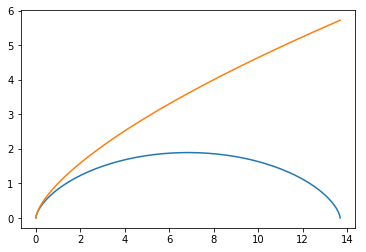

In [119]:
import matplotlib.pyplot as plt

G = 6.672e-8  # G (cgs)
M = 1e12*2e33 # M_i to grams
#A = 1.5*3.086e24 # convert R_i to (cm)
B = (13.7 - 0.0166)*3.154e7*1e9 # t_age,0 - t_age,i for overdensity that *just* collapses
A = np.power((G*M*B**2), 1./3)  # (cm)
eta = np.linspace(0, 2*np.pi, 200)
R = A*(1   - np.cos(eta))/3.086e24 # convert to Mpc
t = 1/(2*np.pi)*B*(eta - np.sin(eta))/3.154e16 # conert to Gyr
a100 = 1.
a = a100*np.power(t, 2./3)
plt.plot(t, R)
plt.plot(t, a)
#plt.plot(t, R*a)
#plt.axvline(x = 13.7)
plt.show()

* Calculate solution $\delta(t)$, where $\delta(t)=\rho(t)/\bar{\rho}_{\rm m}(t)-1$ is the density contrast of the perturbation for the same perturbation as in the previous exercise.  Plot $\delta(t)$ for the top-hat model solution and compare it to the linear evolution $\delta\propto D_+(t)$, where $D_+(t)$ is the linear growth factor. Compare $\delta_{\rm lin}$ - the overdensity predicted by linear evolution with the actual evolution predicted by the top-hat collapse model near the time of collapse, $t_{\rm coll}$ (i.e., $\eta\approx 2\pi$). (5 points)


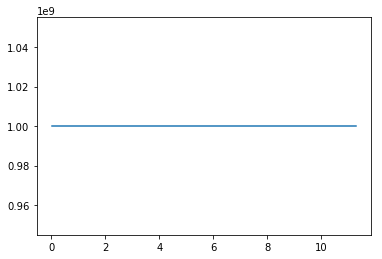

In [144]:
# set cosmology parameters
params = {'flat': False, 'H0': 70.0, 'Om0': 0.3, 'relspecies': False, 'OL0': 0, 
          'Ob0': 0.049, 'sigma8': 0.8, 'ns': 0.968, 'print_warnings': False}
cosmo = cosmology.setCosmology('mycosmo', params )


#a = np.linspace(0.01, 1., 100)
#z = 1/a - 1 # more resolution at late times

R = 1.5                        # comoving in h^{-1} Mpc
z = np.linspace(100., 0., 101) # more resolution at early times
a = 1/(1+z)
M = cosmo.lagrangianM(R)       # returns mass in /h Msun
# compute rms fluctuations on comoving scale R at redshift z
#sig = cosmo.sigma(R, z=z, j=0) 
# compute expansion rate H(z) at redshift z in km/s/Mpc
Hz = cosmo.Hz(z)  
tz = cosmo.age(z)              # age of the universe at z (Gyr)
Omz = cosmo.Om(z)              # Omega_m at redshift z
# density of matter at redshift z
rhoz = cosmo.rho_m(z)          # in h^2 Msun/kpc^3
# growth factor of the universe normalize to 1.0 at z=0
Dz = cosmo.growthFactor(z)


rho = M/(4./3.*np.pi*a**3.*R**3.)
delta = rho/rhoz - 1
plt.plot(tz, delta)
plt.show()

In [147]:
rhoz

array([  8.57678601e+07,   8.32454400e+07,   8.07729672e+07,
         7.83499422e+07,   7.59758655e+07,   7.36502376e+07,
         7.13725591e+07,   6.91423305e+07,   6.69590524e+07,
         6.48222252e+07,   6.27313495e+07,   6.06859258e+07,
         5.86854546e+07,   5.67294365e+07,   5.48173720e+07,
         5.29487616e+07,   5.11231058e+07,   4.93399053e+07,
         4.75986604e+07,   4.58988718e+07,   4.42400399e+07,
         4.26216653e+07,   4.10432485e+07,   3.95042900e+07,
         3.80042905e+07,   3.65427503e+07,   3.51191700e+07,
         3.37330502e+07,   3.23838913e+07,   3.10711940e+07,
         2.97944587e+07,   2.85531859e+07,   2.73468762e+07,
         2.61750302e+07,   2.50371483e+07,   2.39327310e+07,
         2.28612790e+07,   2.18222926e+07,   2.08152725e+07,
         1.98397192e+07,   1.88951332e+07,   1.79810150e+07,
         1.70968652e+07,   1.62421843e+07,   1.54164728e+07,
         1.46192312e+07,   1.38499601e+07,   1.31081600e+07,
         1.23933314e+07,

In [132]:
tz

array([  0.01662688,   0.01687604,   0.01713171,   0.01739411,
         0.01766344,   0.01793992,   0.01822376,   0.01851517,
         0.01881436,   0.01912155,   0.01943695,   0.01976076,
         0.02009321,   0.0204345 ,   0.0207849 ,   0.02114496,
         0.02151532,   0.02189663,   0.02228954,   0.02269469,
         0.02311272,   0.02354428,   0.02399002,   0.02445059,
         0.02492661,   0.02541875,   0.02592765,   0.02645395,
         0.0269983 ,   0.02756134,   0.02814372,   0.02874608,
         0.02936908,   0.03001338,   0.03068036,   0.03137194,
         0.0320901 ,   0.03283678,   0.03361396,   0.0344236 ,
         0.03526766,   0.03614809,   0.03706687,   0.03802594,
         0.03902728,   0.04007285,   0.0411646 ,   0.0423045 ,
         0.04349457,   0.04473866,   0.04604263,   0.04741241,
         0.04885396,   0.05037324,   0.05197618,   0.05366875,
         0.05545689,   0.05734656,   0.0593437 ,   0.06145427,
         0.06368489,   0.06604927,   0.06856536,   0.07

<b>2. (20 points) Evolution of stellar mass function and galaxy-halo connection</b> <br> 

Below you will find a script showing you how to use <tt>colossus</tt> routines to compute halo mass functions in the Sheth et al. approximations (see S 2.4 in the notes) at different redshifts. 

(a) (10 points) Using the composite stellar mass function derived in HW 2, derive $M_*-M_h$ relation using *abundance matching (AM) ansatz*. If you did not get it correctly in your solution, please make a correction using my solution as a guide. It may help to use a smooth version of the function using functional Baldry et al. fit, so that it can be extended to smaller masses. 

The AM ansatz is motivated by the fact that all  galaxies in the CDM scenario are assumed to form in the centers of host dark matter halos. It further assumes that scatter between stellar mass and halo mass is small, so one can derive $M_*-M_{\rm h}$ relation simply by matching stellar mass function and halo mass function at the same $z$:
$$n_{\rm g}(>M_*)=n_{\rm h}(>M_h),$$
i.e., matching cumulative stellar mass and halo mass functions. 

For this exercise to be more accurate we also need to account not only for the "isolated" halos described by the halo mass function expressions, but also for the satellite halos (aka subhalos) which exist inside the isolated host halos. For this, you can use the subhalo fraction as a function of mass calibrated by <a href="http://adsabs.harvard.edu/abs/2013ApJ...770...57B">Behroozi et al. 2013</a> in their equations G5-G7 in Appendix G. To account for satellite halos, multiply the SMT mass functions above by $1+f_{\rm sub}$, where $f_{\rm sub}$ is given by function <tt>fsub</tt> below.

To compute the cumulative functions from differential function you can use one of the integration routines in <a href="http://docs.scipy.org/doc/scipy/reference/integrate.html">scipy.integrate</a>. To solve the above abundance matching numerically, approximate $n_g(>M_*)$ and $n_h(>M_h)$ by <a href="http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.UnivariateSpline.html">splines</a> and use the splines to get $M_*-M_h$ and $M_{\rm HI}-M_h$ relations. See P.S. and codes below for additional info and examples of how to spline and integrate. (10 points)

(a) (10 points) Plot the evolution of the observed stellar mass function described by equations in S 2 of <a href="http://adsabs.harvard.edu/abs/2015ApJ...798..115L">Leja et al. 2015</a>,  for $0<z<2.5$ and single Schechter fit from the CANDELS and CANDELS-S surveys at $z>3$, which is implemented in the script below as function <tt>nmstz</tt>. Comment on differences and similarities to the evolution of halo mass function shown below. <br> (3 points) Repeat the abundance matching exercise at these higher redshifts using the Leja et al. stellar mass functions. How does the $M_*-M_h$ relation evolve? (7 points)
You can compare your results with results presented in Figure 7 of <a href="http://adsabs.harvard.edu/abs/2013ApJ...770...57B">Behroozi et al. 2013.</a> Discuss inferences for the process of galaxy formation that you can glean from this plot. 

P.S. Note that for integration we need to spline the actual function to be integrated under the integration as a function of variable over which integral performed:
$$N(>M)=\int_M^{\infty}\frac{dn}{dM}dM=\int_{\rm ln M}^\infty \frac{dn}{d\ln M}d\ln M=\int_{\rm log_{10} M}^\infty \frac{dn}{d\log_{10} M}d\log_{10} M,$$
so depending the choice of how to integrate, I should spline $dn/d\log_{10}M$ as a function of $\log_{10} M$, or $dn/d\ln M$ as a function of $\ln M$ etc. Below is a simple example showing how to spline tabulated functions and integrate them. 


C:\Users\h2_sf\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: divide by zero encountered in log10


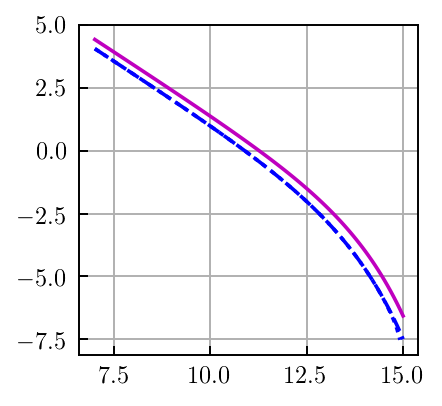

In [7]:
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline
from code.plot_utils import plot_pretty
from scipy.interpolate import UnivariateSpline
from scipy.integrate import quadrature

plot_pretty()

# tabulate an arbitrary but fairly realistic example function
lx = np.linspace(7., 15., 100); x = 10.**lx
y = 2.77e11/x*np.exp(-(x/3.e12)**(1./3.))
ly = np.log10(y)
# construct spline in log-log space, no smoothing
yxsp = UnivariateSpline(lx, ly, s=0.0)

#define function for integration using spline
def fint(lm):
    return 10.**yxsp(lm)

ycum = np.zeros_like(lx); ycum2 = np.zeros_like(lx); 
# if one splines the function under the integral itself, one can use integral method of the spline
yxsplin = UnivariateSpline(lx,y,s=0.0)

for i, lxd in enumerate(lx):
    ycum[i] = quadrature(fint,lxd,15.5)[0]
    ycum2[i] = yxsplin.integral(lxd,np.inf)

%matplotlib inline
fig, ax = plt.subplots(1,1,figsize=(2.5,2.5))
plt.plot(lx,np.log10(ycum), '--', c='b')
plt.plot(lx,np.log10(ycum2),':', c='b')
plt.plot(lx,ly,'-', c='m')

plt.grid()
plt.show()

The code illustrates two ways in which integral can be obtained - one by integrating a function defined using spline, and the second using the integral method of spline itself. The latter, however, requires that the function under the integral is splined. This is not always convenient or accurate, but probably will work here. Now here is how you can use splines to abundance match. We define a second function and match it to the first. Note that the first variable in UnivariateSpline must be monotonic, so the order of arrays is reversed before this is done.

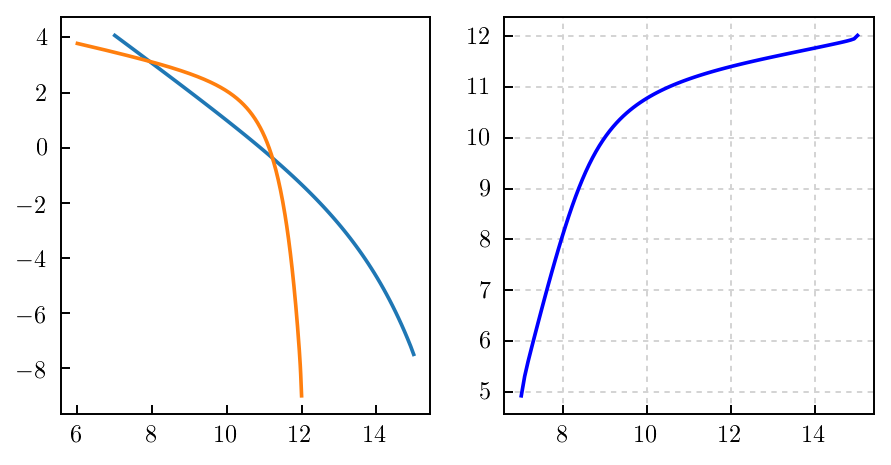

In [9]:
# tabulate an arbitrary but fairly realistic example function
lx2 = np.linspace(6., 12., 500); x2 = 10.**lx2
z = 1.e-6*2.77e11/x2**0.3*np.exp(-(x2/5.e10))
lz = np.log10(z)

zcum = np.zeros_like(lx2); 
# if one splines the function under the integral itself, one can use integral method of the spline
zxsplin = UnivariateSpline(lx2,z,s=0.0)

for i, lxd in enumerate(lx2):
    zcum[i] = zxsplin.integral(lxd,np.inf)

zcum[zcum<=0] = 1.e-9
# note that the first variable in the spline must be increasing, so we need to invert zcum
zcumr = zcum[::-1]; lx2r = lx2[::-1]
matchspl = UnivariateSpline(zcumr, lx2r, s=0.0)

lxmatch = matchspl(ycum2)

fig, ax = plt.subplots(1,2,figsize=(6,3))
ax[0].plot(lx, np.log10(ycum)); ax[0].plot(lx2, np.log10(zcum))

ax[1].plot(lx, lxmatch,  c='b')

ax[1].grid(linestyle='dotted', c='lightgray')
plt.show()

here are the routines computing stellar mass function from Leja et al. (2015)

In [10]:
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy.interpolate import UnivariateSpline
import matplotlib.cm as cm
import matplotlib.colors as colors

def nmstz(ms, z):
    """
    compute analytic double Schechter representation of the observed stellar mass function as a function
    of redshift using calibration of Leja et al. 2015, 798, 115 (see eqs in their S 2)
    note that this calibration is for 3<z<0 - I checked it gives grossly incorrect results at z>3
    
    input: ms - array of stellar masses
            z - redshift
    output: dn/dlog10(M*) in dex^-1 Mpc^-3
    """
    if z <= 3.0:
        z2 = z * z; lms = np.log10(ms)
        lphi1 = -2.46 + 0.07*z - 0.28*z2 
        lphi2 = -3.11 - 0.18*z - 0.03*z2
        lmst  = 10.72 - 0.13*z + 0.11*z2
        mst = np.power(10.,lmst); mus = ms/mst
        a1 = -0.39; a2 = -1.53
        nmstz = np.log(10.)*np.exp(-mus)*(mus)*(10.**lphi1*mus**a1+10.**lphi2*mus**a2)
    else:
        """
        high-z SMF estimates from CANDELS and S-CANDELS from the talk by Song 
        http://www.astrodeep.eu/wp-content/uploads/2015/02/MSong.sesto_.Jan2015.pdf
        """
        z_h     = [4.0, 5.0, 6.0, 7.0]
        lmst_z  = [10.68, 10.58, 10.22, 10.45]
        ah_z    = [-1.59, -1.68, -1.89, -1.93]
        lphi_z = [-3.77, -3.99, -4.34, -4.94]

        lmst  = UnivariateSpline(z_h, lmst_z)
        ahz   = UnivariateSpline(z_h, ah_z)
        lphiz = UnivariateSpline(z_h, lphi_z)
        a = ahz(z); mst = np.power(10., lmst(z)); phiz = np.power(10.,lphiz(z))
        mus = ms/mst
        nmstz = np.log(10.)*phiz*np.exp(-mus)*(mus)**(a + 1.0)

    return nmstz


lms = np.arange(6., 12.6, 0.01)
ms = np.power(10., lms)

philejaz0 = nmstz(ms,0.0)


Here is code to compute halo mass functions using the collossus routines

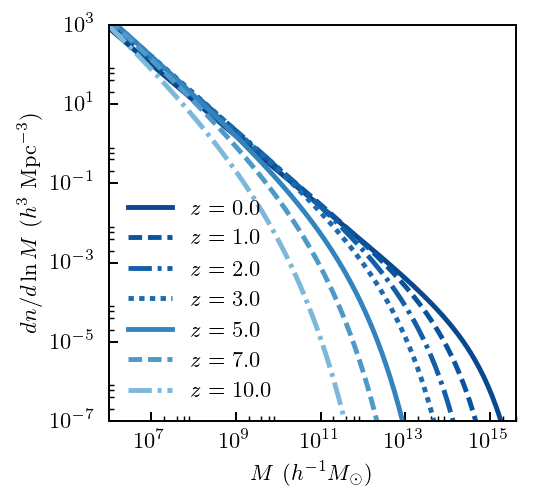

In [12]:
from colossus.cosmology import cosmology
import matplotlib.cm as cm
import matplotlib.colors as colors

# define a vector of cosmological parameters:    
my_cosmo = {'flat': True, 'H0': 70.0, 'Om0': 0.27, 'Ob0': 0.045714, 'sigma8': 0.82, 'ns': 0.96}
# set my_cosmo to be the current cosmology	
cosmo = cosmology.setCosmology('my_cosmo', my_cosmo)
#cosmo.interpolation = False

z0=0.0
z = np.array([0.0, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0])

fig = plt.figure(figsize = (3,3))
from code.plot_utils import plot_pretty
plot_pretty()

# grid of halo masses in /h Msun
lmh = np.arange(6.,15.5,0.05)
mh = np.power(10.,lmh)
# compute Lagrangian radius corresponding to perturbation of mass mh in /h Mpc
rh = cosmo.lagrangianR(mh)
# compute rms fluctuation sigma(R) using default Eisenstein & Hu 1998 power spectrum and tophat filter
sig = cosmo.sigma(rh,z0)
# and its logarithmic derivative dlog(sigma)/dlogR
dsdr = cosmo.sigma(rh, z0, derivative='True')
# dln(sigma)/dlnR -> dln(sigma)/dlnM, M = (4*pi/3) rho_mean * R^3
dsdm = dsdr / 3.0

#
#  SMT01 mass function parameters
#
q_smt = 0.3; A_smt = 0.322; a_smt = 0.707

nu = cosmo.peakHeight(mh, 0.0)
nup = np.sqrt(a_smt)*nu

fig = plt.figure(figsize = (3,3))
plt.xlabel(r'$M\ (h^{-1} M_{\odot})$'); plt.ylabel(r'$dn/d\ln M\ (h^3\ \rm Mpc^{-3})$')
plt.yscale('log'); plt.xscale('log')
plt.xlim(1.e6, 4.e15); plt.ylim(1.e-7,1.e3)

cnorm  = colors.Normalize(vmin=0, vmax=22)
scalarmap = cm.ScalarMappable(norm=cnorm, cmap=cm.Blues)

z = np.array([0.0, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0])
lstyles = ['-','--','-.',':','-','--','-.']
nc = np.zeros_like(z)
for i, zd in enumerate(z): nc[i] = np.int(30.*(20.0-zd)/30.0)
color = scalarmap.to_rgba(nc)

for i,zd in enumerate(z):
    nu = cosmo.peakHeight(mh, zd)
    nup = np.sqrt(a_smt)*nu
    dsdmz = dsdm*cosmo.growthFactor(zd)
    nsmt2 = A_smt*np.sqrt(2.0/np.pi)*cosmo.Om0*2.77e11/mh*(1.0+1./nup**(2.*q_smt))*nup*np.abs(dsdm)*np.exp(-0.5*nup**2)

    plt.plot(mh,nsmt2,c=color[i], ls=lstyles[i], linewidth=2.0, label=r'$z=%.1f$'%zd)
    
plt.legend(frameon=False, loc='lower left', fontsize=9)
#plt.grid()
plt.show()

Here is routine to compute abundance of subhalos, using calibration of Behroozi et al. (2013). 

In [13]:
def fsub(mh, z):
    """
    subhalo fraction calibration from the Appendix G of Behroozi et al. 2013
    as a function of Mpeak - eqs G9-10
    input: mh = halo mass in Msun
           z  = redshift
    """
    aexp = 1.0/(1.0+z)
    aexp2 = aexp*aexp; aexp3 = aexp2*aexp; aexp4 = aexp3*aexp
    Ca = -1.91 + 6.23*aexp - 15.07*aexp2 + 15.02*aexp3  - 5.29*aexp4
    Mcutoff = 10.66 + 15.93*aexp - 21.39*aexp2 + 18.20*aexp3 - 8.21*aexp4
    return 10.**Ca*np.log10(10.**Mcutoff/mh)



<b>3. Galaxy evolution model. (15 points)</b> To get appreciation for processes that shape galaxy properties, we will build 
a fairly simple galaxy formation model. Many elements will be based on the model described  in S 2.1-2.2 of <a href="http://adsabs.harvard.edu/abs/2013MNRAS.433.1910F">Feldmann (2013)</a> (some details can also be found in S 2 of <a href="http://adsabs.harvard.edu/abs/2012ApJ...753...16K">Krumholz & Dekel 2012</a>). It is essentially a system of ODEs with specified sink and source terms specified by the model. The ODEs can be integrated using one of the python integrators. The code used below uses <a href="http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.integrate.odeint.html">scipy.integrate.odeint</a><br><br>

We will start with the bare-bones model framework that I provide in the python code <tt>galaxy_model.py</tt> in <tt>code/</tt> subdirectory. The code uses object-oriented features of python (namely class and methods), which are convenient tools
for this purpose. If you are not familiar with classes, you can read some intro material <a href="https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/">here</a>, for example (we will only use the most basic features and you can see everything that's needed in my code, except for inheritance, which we can discuss later).

Specifically, in <tt>galaxy_model.py</tt> a bare-bones galaxy model is implemented as a python class, which is convenient in this case because it allows to collect all the relevant quantities and functions and encapsulate them in a single object. This then makes it easy to create collections of model galaxies with a given set of parameters, or to initialize a model at any instance in time given the key parameters and use class methods to compute quantities of interest (like SFR) easily without the need to store them. 

Below you can see example of how model galaxies are instantiated and used. 

The model implements realistic evolution of halo mass, but simply assumes that baryons with universal fraction accrete onto galaxy instantly and then get converted into stars on a constant 2.5 Gyr time scale.

In [1]:
import numpy as np
import code.galaxy_model as gm
from colossus.cosmology import cosmology

# define a vector of cosmological parameters:    
my_cosmo = {'flat': True, 'H0': 70.0, 'Om0': 0.27, 'Ob0': 0.045714, 'sigma8': 0.82, 'ns': 0.96}
# set my_cosmo to be the current cosmology
cosmo = cosmology.setCosmology('my_cosmo', my_cosmo)    

In [2]:
from scipy.integrate import odeint

def test_galaxy_evolution(Minit, sfrmodel, cosmo, verbose):
    zg = np.linspace(20., 0., 40) # grid of redshifts
    t_output = cosmo.age(zg) # and corresponding times

    # instantiate a galaxy model at t=tinit assuming a given star fromation model and cosmology
    g = gm.model_galaxy(t = t_output[0], Mh = Minit, Mg = None, Ms = None, MZ = None, 
                     sfrmodel = sfrmodel, cosmo = cosmo, verbose = verbose)
    
    # array of quantities to evolve with ODE solver
    y0 = np.array([g.Mh, g.Mg, g.Ms, g.MZ])
    # evolve y0 in time
    Mout = odeint(g.evolve, y0, t_output, rtol = 1.e-7, mxstep = 4000)
    
    # let's split the output into arrays with intuitive names
    Mhout = np.clip(Mout[:,0], 0.0, 1.e100)
    Mgout = np.clip(Mout[:,1], 0.0, 1.e100)
    Msout = np.clip(Mout[:,2], 0.0, 1.e100)
    MZout = np.clip(Mout[:,3], 0.0, 1.e100)

    return zg, t_output, Mhout, Mgout, Msout, MZout

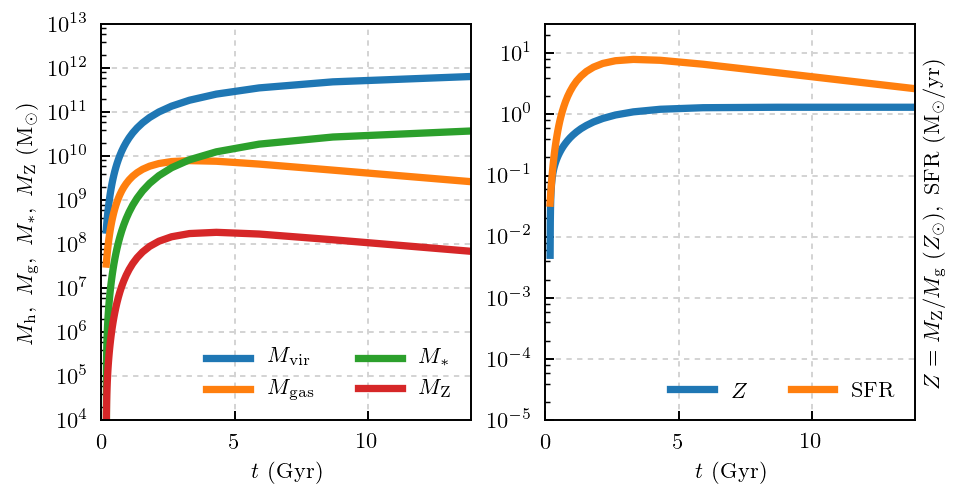

In [4]:
sfrmodel = "gaslinear"  
# let's take a look at how a halo that has MW-like halo mass at z=0 evolves
# the class method test_galaxy_evolution does some basic run of the model and plots results, so let's setup 
# matplotlib parameters for plotting
from code.plot_utils import plot_pretty
%matplotlib inline
from matplotlib import pylab as plt
plot_pretty()

zg, t_output, Mhout, Mgout, Msout, MZout = test_galaxy_evolution(Minit=2.1e8, 
                                                                 sfrmodel=sfrmodel, cosmo=cosmo, 
                                                                 verbose=False)

#
# plot
#
tu = cosmo.age(0.0) # the age of the Universe

fig, ax = plt.subplots(1,2, figsize=(6,3))    
ax[0].set_xlabel(r'$t\ \rm (Gyr)$'); ax[0].set_ylabel(r'$M_{\rm h},\ M_{\rm g},\ M_{*},\ M_{\rm Z}\ (\rm M_\odot)$')
ax[0].set_xlim(0.,tu); ax[0].set_ylim(1.e4,1.e13)
ax[0].set_yscale('log')
ax[0].plot(t_output, Mhout, lw = 3.0, label=r'$M_{\rm vir}$')
ax[0].plot(t_output, Mgout, lw = 3.0, label=r'$M_{\rm gas}$')
ax[0].plot(t_output, Msout, lw = 3.0, label=r'$M_{\rm *}$')
ax[0].plot(t_output, MZout, lw = 3.0, label=r'$M_{\rm Z}$')

ax[0].legend(frameon=False,loc='lower right', ncol=2, fontsize=9)
ax[0].grid(linestyle='dotted', c='lightgray')
    
# plot SFR and Z(t)
ax[1].set_xlabel(r'$t\ \rm (Gyr)$'); ax[1].set_ylabel(r'$Z= M_{\rm Z}/M_{\rm g}\ (Z_\odot),\rm\ SFR\ (M_\odot/yr)$')
ax[1].set_xlim(0.,tu); ax[1].set_ylim(1.e-5,30.)
ax[1].set_yscale('log')
ax[1].yaxis.set_label_position('right')


ax[1].plot(t_output, MZout/Mgout/0.02, lw = 3.0, label=r'$Z$')
SFR = np.zeros_like(t_output); 

for i, td in enumerate(t_output):
    ge = gm.model_galaxy(t = td, Mh = Mhout[i], Mg = Mgout[i], Ms = Msout[i], MZ = MZout[i], 
                         sfrmodel = sfrmodel, cosmo = cosmo)
    SFR[i] = ge.SFR(td)*1.e-9;

ax[1].plot(t_output,SFR, lw = 3.0, label=r'$\rm SFR$')
ax[1].legend(frameon=False,loc='lower right', ncol=2, fontsize=9)
ax[1].grid(linestyle='dotted', c='lightgray')
plt.show()


Briefly discuss the main features of the evolution of total halo mass, $M_{\rm vir}$, and other parameters? Interpret the evolution of total mass, $M_{\rm vir}$ in terms of peak collapse processes? (5 points)

Now let's run a grid of model galaxies in halos of different masses and plot the stellar mass-halo mass.

In [7]:
from scipy.interpolate import interp2d

# initial metallicity
Z_IGM = 2.e-5

# grid of redshifts and halo masses
Nz = 41; Nm = 100
zg = np.linspace(30., 0., Nz)
lzg1 = np.log10(1.0+zg)
t_output = cosmo.age(zg)
    
lMh = np.linspace(5.0, 8., Nm)
Mh  = np.power(10, lMh)

# arrays to hold evolutionary grids of halo mass, gas mass, stellar mass and metal mass
Mhout = np.zeros((Nm,Nz)); Mgout = np.zeros((Nm,Nz))
Msout = np.zeros((Nm,Nz)); MZout = np.zeros((Nm,Nz))
#evolve a grid of halo masses
for j, Mhd in enumerate(Mh):
    if not j%5:
        print "evolving halo of log10(Mh)=%2.2f ..."%(lMh[j])
    # instantiate a model galaxy with a given halo mass at the initial time
    g = gm.model_galaxy(t = t_output[0], Mh = Mhd, Mg = None, Ms = None, MZ = None, Z_IGM = Z_IGM, sfrmodel = sfrmodel, cosmo = cosmo)
    # initial values of masses
    y0 = np.array([g.Mh, g.Mg, g.Ms, g.MZ])
    # solve the system of ODEs
    Mout = odeint(g.evolve, y0, t_output, rtol = 1.e-5, mxstep = 4000)
    Mout = Mout/g.cosmo.h
    # split Mout into arrays for specific masses with more intuitive names for convenience
    Mhout[j,:] = Mout[:,0]; Mgout[j,:] = Mout[:,1]
    Msout[j,:] = Mout[:,2]; MZout[j,:] = Mout[:,3]
# 
# prepare 2D splines for interpolation
#
Mmin = 1.e-10 # prevent zeros in case no SF occurred
lMhi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Mhout)), bounds_error=True, kind='cubic')
lMgi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Mgout)), bounds_error=True, kind='cubic')
lMsi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,Msout)), bounds_error=True, kind='cubic')
lMZi = interp2d(lzg1, lMh, np.log10(np.maximum(Mmin,MZout)), bounds_error=True, kind='cubic')


evolving halo of log10(Mh)=5.00 ...
evolving halo of log10(Mh)=5.15 ...
evolving halo of log10(Mh)=5.30 ...
evolving halo of log10(Mh)=5.45 ...
evolving halo of log10(Mh)=5.61 ...
evolving halo of log10(Mh)=5.76 ...
evolving halo of log10(Mh)=5.91 ...
evolving halo of log10(Mh)=6.06 ...
evolving halo of log10(Mh)=6.21 ...
evolving halo of log10(Mh)=6.36 ...
evolving halo of log10(Mh)=6.52 ...
evolving halo of log10(Mh)=6.67 ...
evolving halo of log10(Mh)=6.82 ...
evolving halo of log10(Mh)=6.97 ...
evolving halo of log10(Mh)=7.12 ...
evolving halo of log10(Mh)=7.27 ...
evolving halo of log10(Mh)=7.42 ...
evolving halo of log10(Mh)=7.58 ...
evolving halo of log10(Mh)=7.73 ...
evolving halo of log10(Mh)=7.88 ...


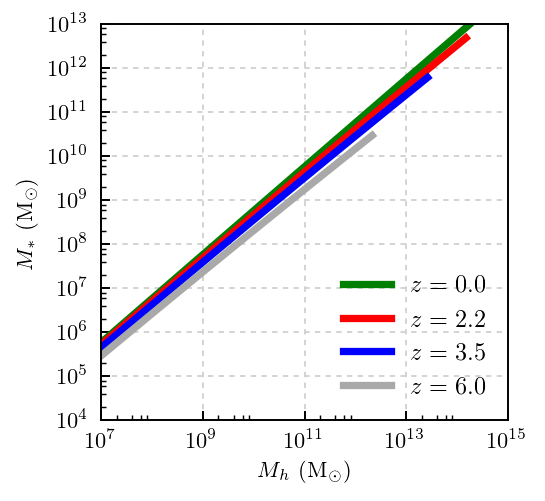

In [6]:
#
# plot
#

fig = plt.figure(figsize=(3, 3))
plot_pretty()
plt.xlabel(r'$M_h\ \rm (M_\odot)$')
plt.ylabel(r'$M_{*}\ \rm (M_\odot)$')
plt.xlim(1.e7,1.e15); plt.ylim(1.e4,1.e13)
plt.xscale('log'); plt.yscale('log')
        
z_plot = np.array([0., 2.2, 3.5, 6.0])
# colors a la Feldmann for easier comparison
zcolors = ['green', 'red', 'blue', 'darkgray']
for i, zplot in enumerate(z_plot):
    Mhz = 10.**lMhi(np.log10(1.0+zplot),lMh)
    Msz = 10.**lMsi(np.log10(1.0+zplot),lMh)
    plt.plot(Mhz, Msz, c=zcolors[i], lw=3.0, label=r'$z=%1.1f$'%zplot)
            
plt.legend(frameon=False,loc='lower right', fontsize=10)
plt.grid(linestyle='dotted', c='lightgray')
plt.show()


Please comment and interpret the resulting stellar mass-halo mass relation in the plot above. For example, why does it have the shape it does and why it evolves in the way you see? How does it compare to your results for this relation from abundance matching in 1? (3 points). 

One way to alter the $M_*-M_{\rm h}$ relation is to shut off gas accretion onto a halo. For small halos this can happen when intergalactic gas temperature is increased by the re-ionization at $z\approx 6-10$. This results in a characteristic halo mass scale below which gas accretion is suppressed that evolves with redshift. This mass is calibrated by numerical simulations and the approximate expression can be found in S 2.1.4 of the notes. Inherit my <tt>model_galaxy</tt> class into a new class (e.g., <tt>my_model_galaxy</tt>) and implement such cutoff mass in the galaxy formation model in the <tt>Mg_in</tt> function (you can do this by modifying external <tt>fg_in</tt> function. Replot the above plot of $M_*-M_h$ and discuss the effects of the gas suppression, if any, on the relation (7 points).